In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
# Считаем количество пропущенных значений по признакам

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Удаляем лишние признаки

df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], inplace=True, axis=1)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [10]:
# Заполняем пропущенные данные возраста средним значением по столбцу

df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\tigra\AppData\Local\Temp\ipykernel_13452\798803380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# 1. Найти количество наблюдений для каждого значения целевой переменной Survived и применить к полученным данным метод plot, чтобы построить столбчатую диаграмму. 

<Axes: xlabel='Survived'>

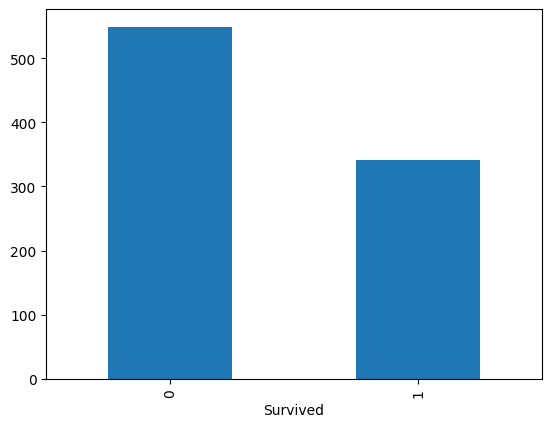

In [12]:

df['Survived'].value_counts().plot(kind='bar')

# 2. Построить такую же диаграмму, используя логарифмический масштаб. 

<Axes: xlabel='Survived'>

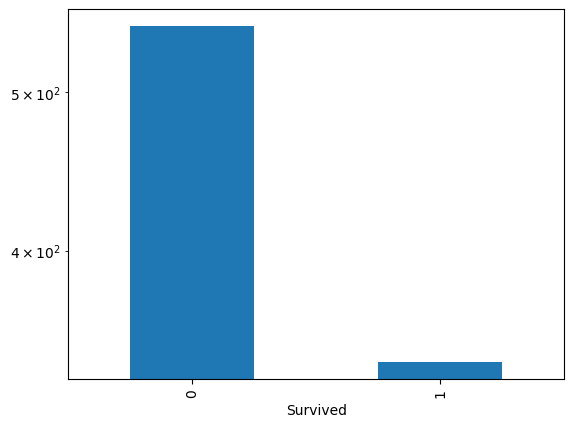

In [13]:
df['Survived'].value_counts().plot(kind='bar', logy=True)

# 3. Построить две гистограммы по значениям признака Pclass - одну для выживших (Survived равен 1) и другую - нет (Survived равен 0). 

<Axes: >

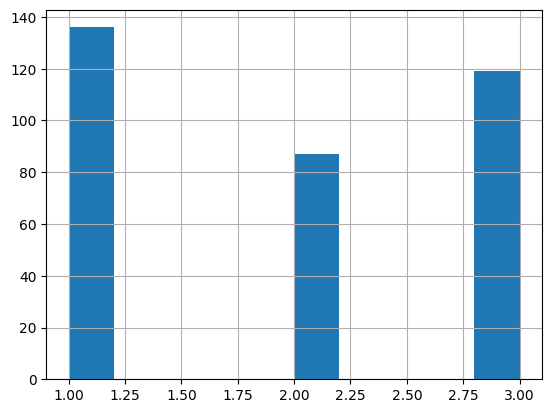

In [21]:
df[df['Survived']==1]['Pclass'].hist(bins=10)

<Axes: >

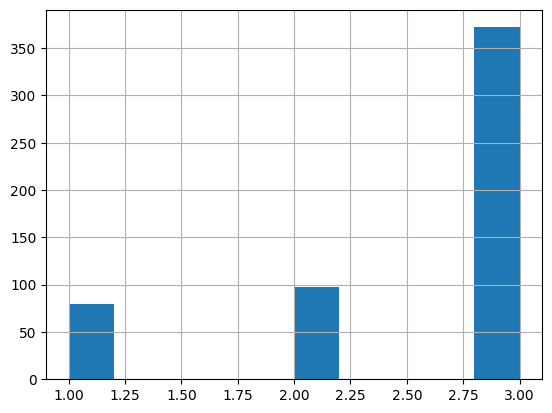

In [15]:
df[df['Survived']==0]['Pclass'].hist(bins=10)

### 4. Подобрать значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга. Создать легенду с двумя значениями: “ Survived 0” и “ Survived 1”. Гистограмма выживших должна быть серого цвета, а невыживших - красного. Название горизонтальной оси – “ Survived”

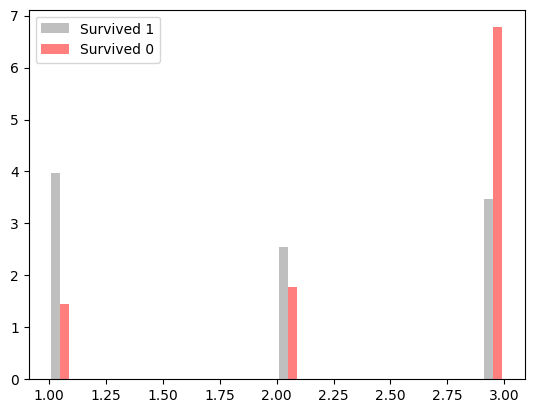

In [115]:
t1 = df[df['Survived']==1]['Pclass']
t2 = df[df['Survived']==0]['Pclass']

plt.hist([t1, t2], bins=20, density=True, color=['grey','red'], alpha=0.5)
plt.legend(labels=['Survived 1', 'Survived 0'])
plt.show()
# df[df['Survived']==1]['Pclass'].plot.kde()


# 5. Аналогично изобразить гистограмму выживаемости относительно пола пассажиров

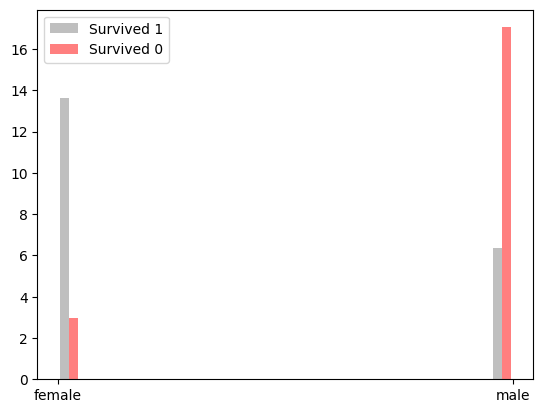

In [116]:
t1 = df[df['Survived']==1]['Sex']
t2 = df[df['Survived']==0]['Sex']

plt.hist([t1, t2], bins=20, density=True, color=['grey','red'], alpha=0.5)
plt.legend(labels=['Survived 1', 'Survived 0'])
plt.show()
# df[df['Survived']==1]['Pclass'].plot.kde()

## 6. Исследовать зависимость выживаемости пассажиров от количества родственников на борту (признак Parch). Построить график, показывающий процент выживших в зависимости от количества родственников

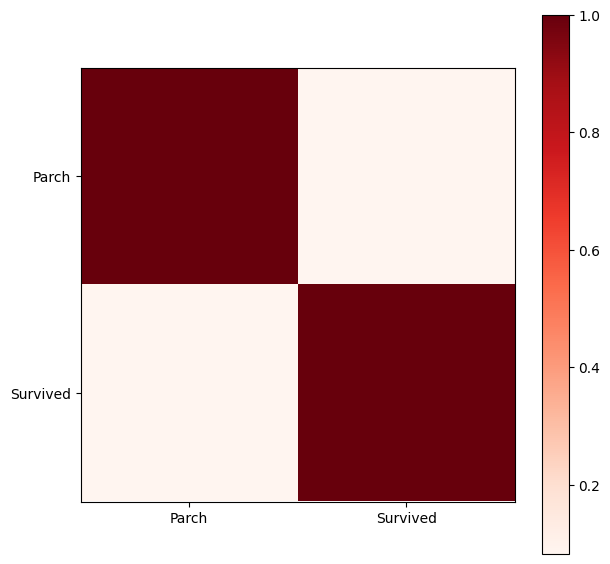

In [89]:
corr_mx = df[['Parch', 'Survived']].corr()
plt.figure(figsize=(7, 7))
plt.imshow(corr_mx, cmap='Reds')
plt.colorbar()

plt.xticks(range(len(corr_mx.columns)), corr_mx.columns)
plt.yticks(range(len(corr_mx)), corr_mx.index);

<Axes: xlabel='Parch'>

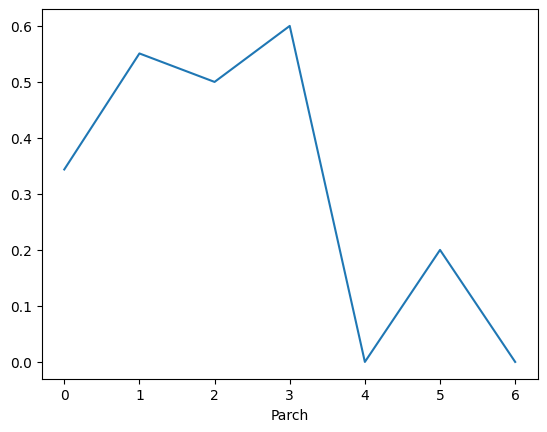

In [144]:
df.groupby('Parch')['Survived'].mean().plot()

## 7. Исследовать распределение стоимости билетов для пассажиров разных возрастных групп. Построить ящик с усами, где по горизонтальной оси будут возрастные группы, а по вертикальной - стоимость билетов.

In [170]:
age_labels = ['0-17', '18-29', '30-49', '50+']
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,18, 30, 50, 81], right=False, labels=age_labels)

AgeGroup
18-29    448
30-49    256
0-17     113
50+       74
Name: count, dtype: int64

C:\Users\tigra\AppData\Local\Temp\ipykernel_13452\3643587181.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['AgeGroup'] == group]['Fare'] for group in age_labels], labels=age_labels)


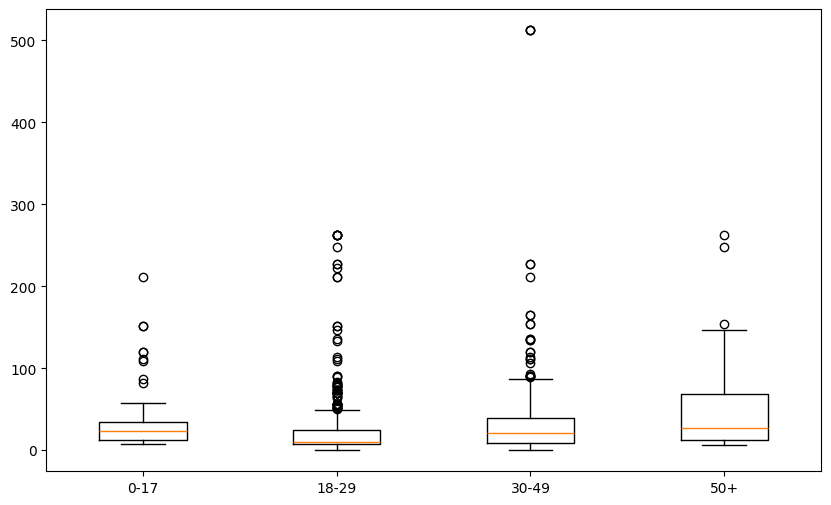

In [182]:

plt.figure(figsize=(10, 6))
plt.boxplot([df[df['AgeGroup'] == group]['Fare'] for group in age_labels], labels=age_labels)
plt.show()

### 8. Определить процент выживших пассажиров по возрастным группам (например, 0-9 лет, 10-19 лет и т.д.) и отобразить результаты на круговой диаграмме.

C:\Users\tigra\AppData\Local\Temp\ipykernel_13452\991594085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(df.groupby('AgeGroup')['Survived'].mean(), labels=age_labels, autopct="%1.1f%%")


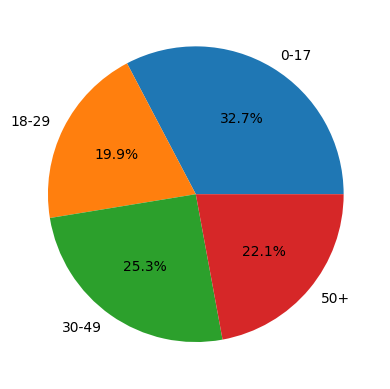

In [191]:
plt.pie(df.groupby('AgeGroup')['Survived'].mean(), labels=age_labels, autopct="%1.1f%%")
plt.show()

# 9. Получить следующие диаграммы

In [224]:

age_labels = list(range(82))
df['TempAgeGroup'] = pd.cut(df['Age'], bins=age_labels, right=False, labels=age_labels[:-1])

In [277]:
import seaborn as sns

C:\Users\tigra\AppData\Local\Temp\ipykernel_13452\3511660445.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = df.groupby('TempAgeGroup')['Survived'].mean()
C:\Users\tigra\AppData\Local\Temp\ipykernel_13452\3511660445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(t,ax=ax, palette="Spectral")


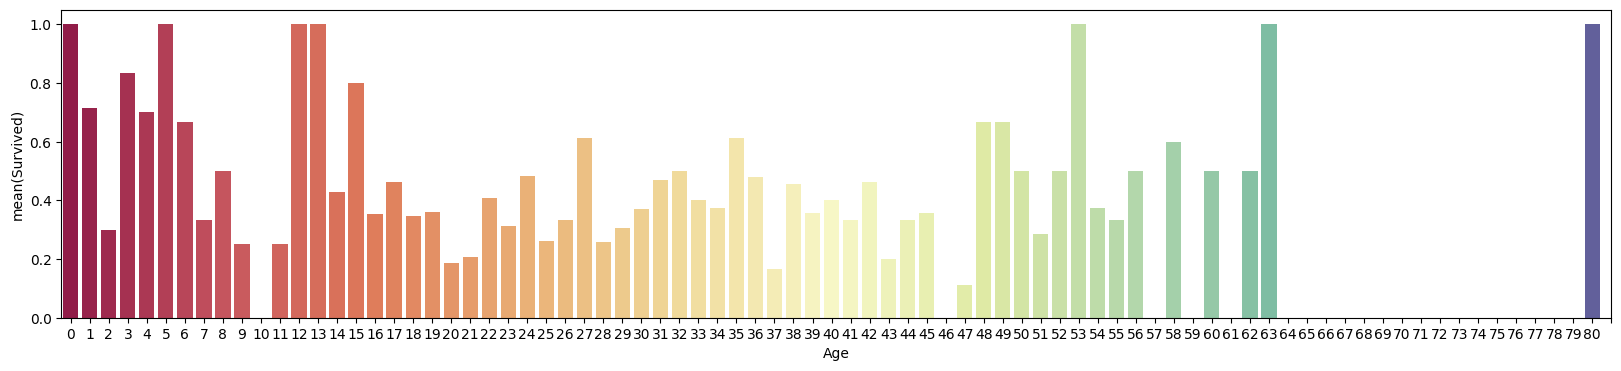

In [291]:
# df.groupby('TempAgeGroup')['Survived'].mean().plot(kind='bar', figsize=(16,4), width=0.9)


t = df.groupby('TempAgeGroup')['Survived'].mean()
fig, ax = plt.subplots(figsize=(20, 4))
ax = sns.barplot(t,ax=ax, palette="Spectral")
# plt.bar(t.index, t, width=0.9)
plt.ylabel('mean(Survived)')
plt.xticks(age_labels)
plt.xlabel('Age')
plt.show()

In [298]:
df['Family'] = ((df['SibSp'] + df['Parch'])>0).map(lambda x: ["Alone", 'With Family'][x])

<BarContainer object of 2 artists>

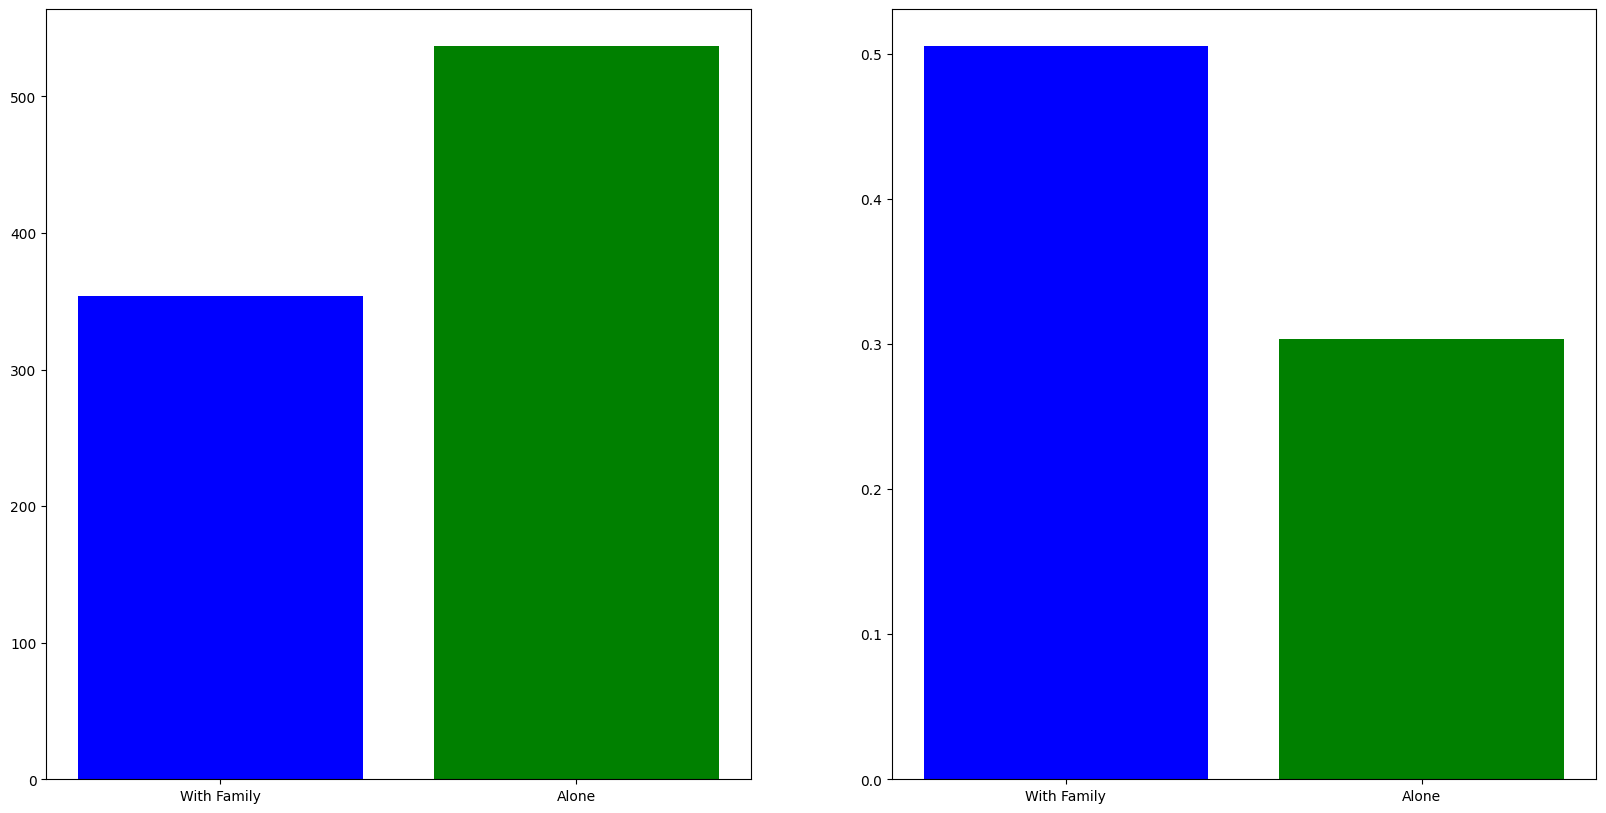

In [312]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 10))
t1 = df.groupby('Family')['Survived'].count()[::-1]
t2 = df.groupby('Family')['Survived'].mean()[::-1]
ax1.bar(t1.index, t1, color=['blue', 'green'])
ax2.bar(t2.index, t2, color=['blue', 'green'])